In [5]:
import yfinance as yf
import pandas as pd

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index and display first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Fetch and parse the webpage
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract tables and convert to DataFrame
tables = soup.find_all('table')
tesla_revenue = pd.read_html(str(tables))[0]  # Extract the first table

# Inspect the table structure before proceeding
print(tesla_revenue.head(10))  # Check structure before renaming

# Rename columns properly
tesla_revenue.columns = ["Date", "Revenue"]  # Adjust column names if needed

# Remove unwanted rows (if any header duplicates exist)
tesla_revenue = tesla_revenue[tesla_revenue["Date"] != "Date"]

# Clean Revenue Column: Remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(',|\$', "", regex=True)

# Convert to numeric format where applicable
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')

# Remove null values and empty strings
tesla_revenue.dropna(inplace=True)

# Display last five rows
print(tesla_revenue.tail())


   Tesla Annual Revenue (Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   
5                                     2016   
6                                     2015   
7                                     2014   
8                                     2013   
9                                     2012   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759  
5                                    $7,000  
6                                    $4,046  
7                                    $3,198  
8                                    $2,013  
9                                

<ipython-input-24-0adbdf7dbed9>:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables))[0]  # Extract the first table


In [25]:
# Get GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Fetch and parse the webpage
response_gme = requests.get(url_gme)
soup_gme = BeautifulSoup(response_gme.text, "html.parser")

# Extract tables from the webpage
tables_gme = soup_gme.find_all('table')

# Extract the first table (inspect before proceeding)
gme_revenue = pd.read_html(str(tables_gme))[0]

# Print first few rows to check structure
print("First 10 rows of the extracted table:")
print(gme_revenue.head(5))

# Print column names to verify
print("\nColumn Names:", gme_revenue.columns)

# Rename columns properly if they are not correct
gme_revenue.columns = ["Date", "Revenue"]  # Adjust based on actual column names

# Remove unwanted rows (if duplicate headers exist)
gme_revenue = gme_revenue[gme_revenue["Date"] != "Date"]

# Clean Revenue Column: Remove commas and dollar signs
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace(',|\$', "", regex=True)

# Convert to numeric format where applicable
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Remove null values and empty strings
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display last five rows
print("\nLast 5 rows of cleaned GameStop revenue data:")
print(gme_revenue.tail())


First 10 rows of the extracted table:
   GameStop Annual Revenue (Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $6,466  
1                                       $8,285  
2                                       $8,547  
3                                       $7,965  
4                                       $9,364  

Column Names: Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')

Last 5 rows of cleaned GameStop revenue data:
    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


<ipython-input-29-3f1cd9411fd6>:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables_gme))[0]


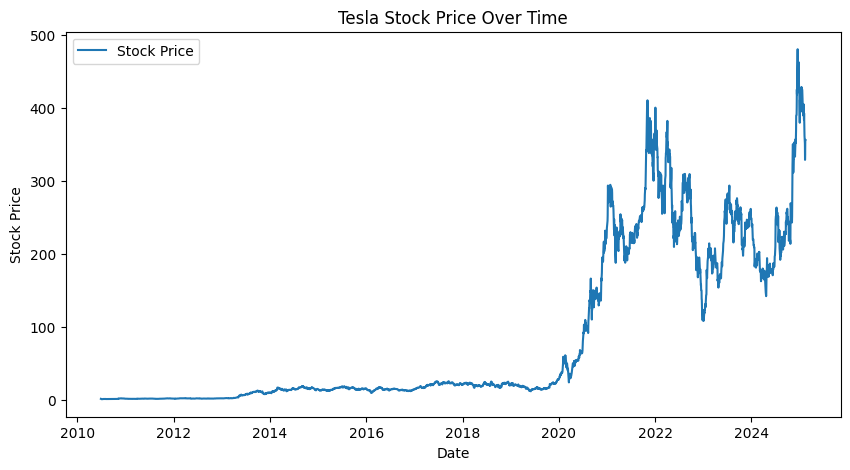

In [9]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10,5))
    plt.plot(stock_data["Date"], stock_data["Close"], label="Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot Tesla stock graph
make_graph(tesla_data, tesla_revenue, "Tesla Stock Price Over Time")


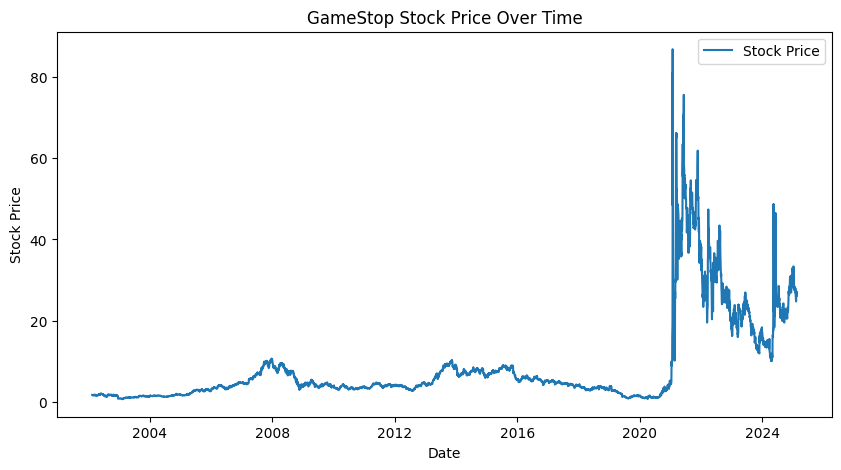

In [10]:
# Plot GameStop stock graph
make_graph(gme_data, gme_revenue, "GameStop Stock Price Over Time")
